## Color Selection:

This image is: <class 'numpy.ndarray'> with dimensions  (540, 960, 3)


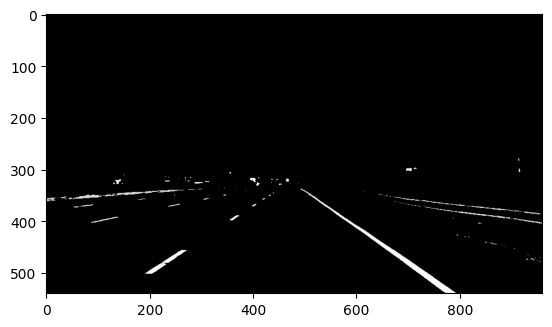

In [201]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read the image from file and load it into an array
image = mpimg.imread('test.jpg') 
# Print information about the image's data type and its dimensions (height, width, color depth)
print("This image is:", type(image), "with dimensions ", image.shape)

# Extract the height (ysize) and width (xsize) of the image from its shape
ysize = image.shape[0]
xsize = image.shape[1]

# Create a copy of the original image to manipulate without altering the original
color_select = np.copy(image)

# Define thresholds for the RGB channels; only pixels with values above these will be kept colorful
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Create a boolean mask where any pixel below the color thresholds across R, G, and B channels is marked True; | = or
thresholds = (image[:,:,0] < rgb_threshold[0]) | (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])

# Use the mask to change pixels below the thresholds to black [0, 0, 0] in the color_select image
color_select[thresholds] = [0,0,0]

# Display the modified image using matplotlib
plt.imshow(color_select)
plt.show()

## Region Masking:

In this case, I'll assume that the front facing camera that took the image is mounted in a fixed position on the car, such that the lane lines will always appear in the same general region of the image. Next, I'll take advantage of this by adding a criterion to only consider pixels for color selection in the region where we expect to find the lane lines.

This image is: <class 'numpy.ndarray'> with dimensions  (540, 960, 3)


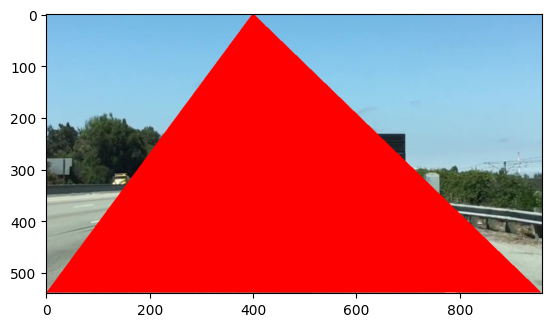

In [220]:
# Read the image from file and load it into a numpy array
image = mpimg.imread('test.jpg') 

# Print information about the image's data type and its dimensions (height, width, color depth)
print("This image is:", type(image), "with dimensions ", image.shape)

# Extract the height (ysize) and width (xsize) of the image from its shape
ysize = image.shape[0]
xsize = image.shape[1]

# Create a copy of the original image to manipulate without altering the original
region_select = np.copy(image)

# Define points for a triangular region of interest (ROI)
# These points form the vertices of the triangle
left_bottom = [0, 539]
right_bottom = [959, 539]
apex = [400, 0]

# Use the polyfit function to fit a line to the points specifying the left and right boundaries of the triangle
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
# Fit a line across the bottom of the triangle
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Create meshgrid for the x and y dimensions
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

# Define a region of interest by setting a threshold based on the fitted lines
# The region will be within the boundaries of the triangle
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color the pixels red where the region meets the threshold criteria
region_select[region_thresholds] = [255, 0, 0]

# Display the image with the region of interest highlighted in red
plt.imshow(region_select)
plt.show()


In [221]:
fit_left

array([ -1.3475, 539.    ])

## Combining Color and Region Selections


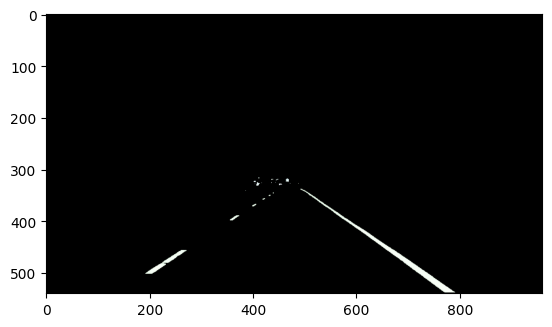

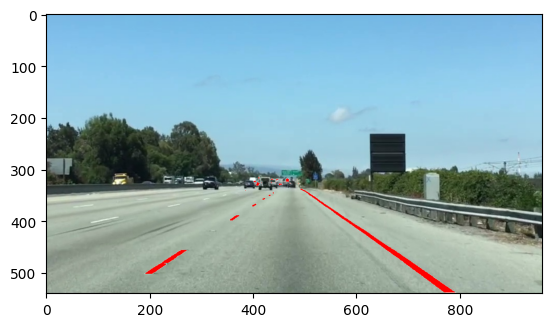

In [457]:
# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [130, 539]
right_bottom = [800, 539]
apex = [470, 270]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# Mask color selection
color_select[color_thresholds | ~region_thresholds ] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.show()
plt.imshow(line_image)

# uncomment if plot does not display
plt.show()

## Canny to Detect Lane Lines

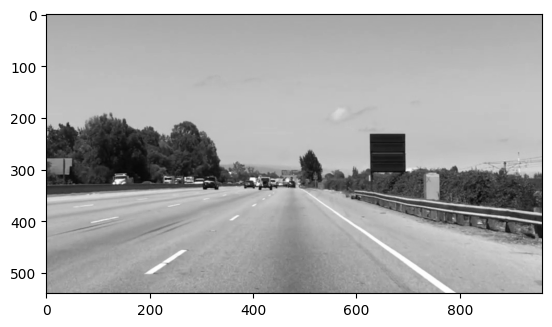

In [460]:
import cv2  #bringing in OpenCV libraries
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

`
edges = cv2.Canny(gray, low_threshold, high_threshold)
`

In this case, you are applying Canny to the image gray and your output will be another image called edges. low_threshold and high_threshold are your thresholds for edge detection.

The algorithm will first detect strong edge (strong gradient) pixels above the high_threshold, and reject pixels below the low_threshold. Next, pixels with values between the low_threshold and high_threshold will be included as long as they are connected to strong edges. The output edges is a binary image with white pixels tracing out the detected edges and black everywhere else.

This range implies that derivatives (essentially, the value differences from pixel to pixel) will be on the scale of tens or hundreds. So, a reasonable range for your threshold parameters would also be in the tens to hundreds.

As far as a ratio of low_threshold to high_threshold, John Canny himself recommended a low to high ratio of 1:2 or 1:3.

We'll also include Gaussian smoothing, before running Canny, which is essentially a way of suppressing noise and spurious gradients by averaging (check out the OpenCV docs for GaussianBlur). cv2.Canny() actually applies Gaussian smoothing internally, but we include it here because you can get a different result by applying further smoothing (and it's not a changeable parameter within cv2.Canny()!).

You can choose the kernel_size for Gaussian smoothing to be any odd number. A larger kernel_size implies averaging, or smoothing, over a larger area. The example in the previous lesson was kernel_size = 3.

Note: If this is all sounding complicated and new to you, don't worry! We're moving pretty fast through the material here, because for now we just want you to be able to use these tools. If you would like to dive into the math underpinning these functions, please check out the free Udacity course, Intro to Computer Vision, where the third lesson covers Gaussian filters and the sixth and seventh lessons cover edge detection.



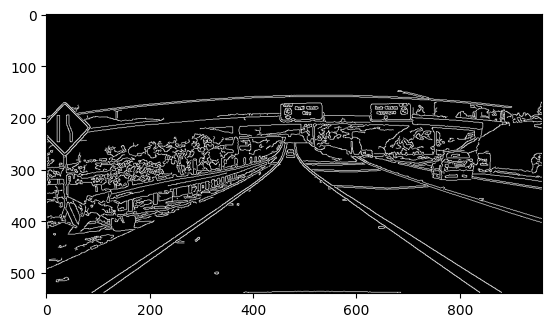

In [477]:
# Ensure the image path is correct and the image loads properly
try:
    image = mpimg.imread('exit-ramp.png')
except FileNotFoundError:
    print("Image file not found. Please check the file path.")
    raise

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# Ensure the image is of type uint8
if gray.dtype != np.uint8:
    gray = np.uint8(gray * 255)

# print(gray)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
low_threshold = 1
high_threshold = 100
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
plt.show()
